# Исследование надежности заемщиков.

<p><b>Цели исследования</b> - определить влияние таких показателей как семейное положение и количество детей на своевременность погашения клиентом кредита.<p>

<p><b>Задачи:</b><p>
<p>1.Вявить зависимость между количеством детей у клиента и своеврменным погашанеием кредита.<p>
<p>2.Вявить зависимость между семейным положением клиента и своеврменным погашанеием кредита.<p>
<p>3.Вявить зависимостьзависимость между уровнем дохода и возвратом кредита в срок.<p>
<p>4.Вявить как цели кредита влияют на его возврат в срок.<p>

## 1. Обзор данных

In [1]:
#импортируем библиотеку pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#в переменную data помещаем значение таблицы
data = pd.read_csv('data(1).csv')

In [3]:
#выведем первые десять строк таблицы на экран
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
# с помщью info выведем информацю о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 1.6+ MB


## 2. Анализ данных

### 2.1 Обработка пропущенных значений

In [5]:
# найдем колличество пропущенных значений 
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [6]:
# проверим, какую долю составляют пропущенные значения в каждом из столбцов с пропусками
data.isna().mean().sort_values(ascending=False)

total_income        0.100999
days_employed       0.100999
purpose             0.000000
debt                0.000000
income_type         0.000000
gender              0.000000
family_status_id    0.000000
family_status       0.000000
education_id        0.000000
education           0.000000
dob_years           0.000000
children            0.000000
dtype: float64

In [7]:
# заполним пропуски медианным значением
data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median())
data['total_income'] = data['total_income'].fillna(data['total_income'].median())
# проверим заменены ли пропущенные значения 
data.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

1.Пропущенно 2174 запси данных в столбцах **"days_employed"** и  **'total_income'**. 

2.Количество пропущенных значений в двух столбцах одинаково и равно **10,09%**.

3.Возможные причины появления пропусков в данных:

    а.Отсутствие значений вследствие каких-то неисправностей в коде программы которая получает данные.
    б.Нежелание респондента при проведении опроса отвечать на вопросы.
    
4.Среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства поэтому лучше использовать медиану. Но здесь нет сильно выделяющихся данных, поэтому можно использовать и медиану и среднее значение. 

### 2.2 Обработка аномалий

In [8]:
#проверми каждый столбец на уникальные значения
for name in data.columns:
    display(name)
    display(data[name].unique()) 

'children'

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

'days_employed'

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

'dob_years'

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

'education'

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

'education_id'

array([0, 1, 2, 3, 4], dtype=int64)

'family_status'

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

'family_status_id'

array([0, 1, 2, 3, 4], dtype=int64)

'gender'

array(['F', 'M', 'XNA'], dtype=object)

'income_type'

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

'debt'

array([0, 1], dtype=int64)

'total_income'

array([253875.6394526 , 112080.01410244, 145885.95229686, ...,
        89672.56115303, 244093.05050043,  82047.41889948])

'purpose'

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

В столбцах 'children' и 'days_employed' имеются отрицательные значения. 

Заменим отрицательные значения на положительные

In [9]:
data.loc[data['children'] < 0, 'children'] = data['children'] * -1

In [10]:
data.loc[data['days_employed'] < 0, 'days_employed'] = data['days_employed'] * -1

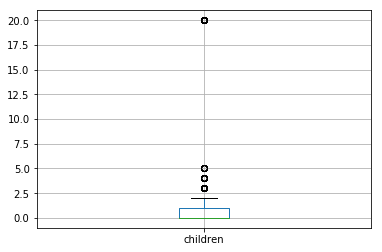

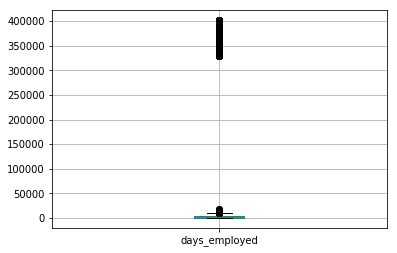

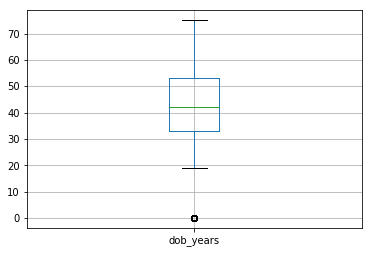

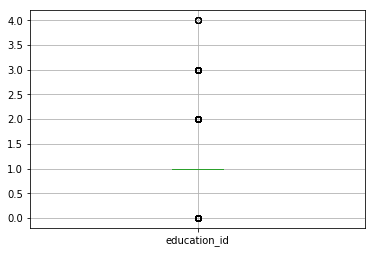

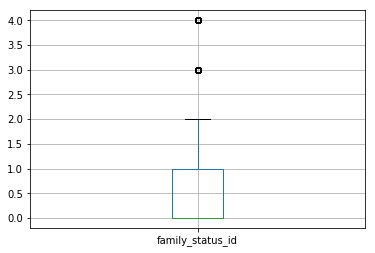

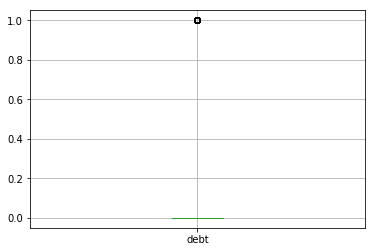

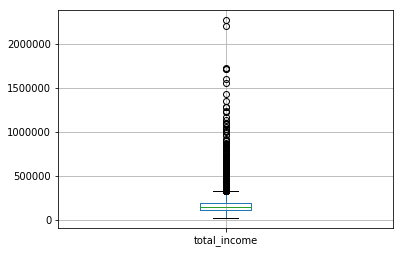

<Figure size 432x288 with 0 Axes>

In [11]:
for name in data.select_dtypes(include='number').columns:
    data.boxplot([name])
    plt.figure()

In [12]:
data.groupby('children').size()/ len(data) * 100

children
0     65.732869
1     22.601626
2      9.547038
3      1.533101
4      0.190476
5      0.041812
20     0.353078
dtype: float64

In [13]:
data.groupby('gender').size()/ len(data) * 100

gender
F      66.137050
M      33.858304
XNA     0.004646
dtype: float64


<p>На основании проведенного анализа выявлены аномальные значения в столбце "количество детей в семье", а также в столбце "пол клиента". Так количество детей равное 20 аномально высоко, маловероятно что 76 человек смогли родить (усыновить) столько детей. Количество клиентов у которых детей в семье 20, что составляет всего 0.3% от общего количества  - удалим строки с этими значениями. Всего один клиент имеет пол "XNA" что составляет всего 0.004% от общего количества - удалим и это значение.<p>


In [14]:
data = data.loc[data['children'] != 20]
data = data.loc[data['gender'] != 'XNA']

### 2.3 Замена вещественного типа данных на  целочисленный

In [15]:
#заменим вещественный тип данных на целочисленный с помощью метода astype()
data['total_income'] = data['total_income'].astype('int') 
#проверим замену с помощью метода info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21448 entries, 0 to 21524
Data columns (total 12 columns):
children            21448 non-null int64
days_employed       21448 non-null float64
dob_years           21448 non-null int64
education           21448 non-null object
education_id        21448 non-null int64
family_status       21448 non-null object
family_status_id    21448 non-null int64
gender              21448 non-null object
income_type         21448 non-null object
debt                21448 non-null int64
total_income        21448 non-null int32
purpose             21448 non-null object
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 1.6+ MB


### 2.4 Поиск дубликатов

 В столбце education есть одни и те же значения, но записанные по-разному с использованием заглавных и строчных букв.

In [16]:
#приведем значения в столбце education к одному регистру
data['education'] = data['education'].str.lower()

In [17]:
#проверим результат преобразования
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Прверим есть ли дубликаты в таблице

In [18]:
data.duplicated().sum()

71

В таблице присутсвует 71 одниковая запись

In [19]:
#удалим дубликаты
data = data.drop_duplicates().reset_index(drop=True)

Проверим остались ли еще дубликаты

In [20]:
data.duplicated().sum()

0

### 2.5 Создаем два новых датафрейма

In [21]:
df_ed = data[['education_id', 'education']]

In [22]:
df_fam = data[['family_status_id','family_status']]


<p>Создадим словарь, чтобы однозначно соотнести значение education/family_status и цифровой идентификатор

In [23]:
df_ed = df_ed.drop_duplicates().reset_index(drop=True)

In [24]:
df_fam = df_fam.drop_duplicates().reset_index(drop=True)

Удалим из исходного датафрейма столбцы education и family_status

In [25]:
data = data.drop(['education', 'family_status'], axis='columns')

### 2.6 Cоздаем столбец total_income_category 

In [26]:
#создадим функцию которая будет присваивать категории
def income_category(total_income):
    if 0 <= total_income <= 30000:
        return 'E'
    elif 30000 < total_income <= 50000:
        return 'D'
    elif 50000 < total_income <= 200000:
        return 'C'
    elif 200000 < total_income <= 1000000:
        return 'B'
    else:
        return 'A'

In [27]:
data['total_income_category'] = data['total_income'].apply(income_category)

### 2.7 Создаем столбец purpose_category

In [28]:
def purpose_category(purpose):
    if 'автомо' in purpose:
        return 'операции с автомобилем'
    elif 'жиль' in purpose:
        return 'операции с недвижимостью'
    elif 'недвиж' in purpose:
        return 'операции с недвижимостью'
    elif 'свадь' in purpose:
        return 'проведение свадьбы'
    elif 'образован' in purpose:
         return 'получение образования'

In [29]:
data['purpose_category'] = data['purpose'].apply(purpose_category)

## 2. Ответы на вопросы.

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [30]:
children = data.groupby('children')['debt'].agg(['count','mean'])
children.sort_values('mean',ascending=False)

,count,mean
children,,
4,41,0.097561
2,2052,0.094542
1,4855,0.091658
3,330,0.081818
0,14090,0.075444
5,9,0.000000


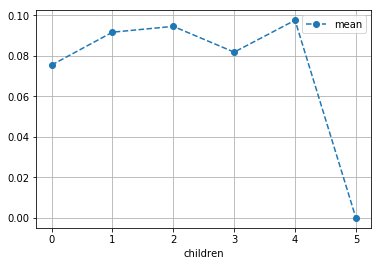

In [31]:
children['mean'].plot(x='children', y='mean', style='o--', grid=True, legend=True)


У клиентов не имеющих детей только в 7% случаях платежи выплачиваются не своевременно, у клиентов имеющих одного или двух детей уже в 9% случаях платежи выплачены не вовремя. В тоже время наблюдается что клиенты имеющие трое или пять детей в плане своевременности внесения платежей более дисциплинированы чем все остальные клиенты имеющие детей. Поэтому четкой зависимости между количеством детей и возвратом кредита в срок не прослеживается.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [32]:
df_fam_new = data[['family_status_id', 'debt']]
df_fam_new = df_fam_new.groupby('family_status_id')['debt'].agg(['count','mean'])
df_fam_new.sort_values('mean',ascending=False)

,count,mean
family_status_id,,
4,2801,0.097465
1,4138,0.093040
0,12290,0.075509
3,1193,0.070411
2,955,0.065969


Клиенты которые не женаты (не замужем) чаще не возвращают вовремя кредит чем клиенты которые в разводе или являются вовцами или вдовой. 

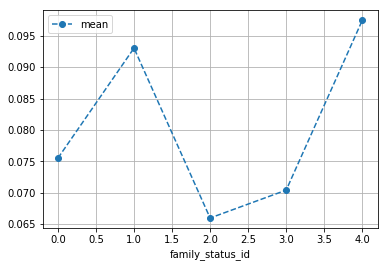

In [33]:
df_fam_new['mean'].plot(x='family_status', y='mean', style='o--', grid=True, legend=True)

In [34]:
#Ключ к графику
df_fam

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [35]:
total_income_category = data.groupby('total_income_category')['debt'].agg(['count','mean'])
total_income_category.sort_values('mean',ascending=False)

,count,mean
total_income_category,,
E,22,0.090909
C,15960,0.084837
A,25,0.080000
B,5020,0.070518
D,350,0.060000


Явной зависимости между уровнем дохода и возвратом кредита в срок не прослеживается. В тоже время клиенты которые имеют уровень зарплаты 30001–50000 чаще возвращают вовремя кредит, чем клиенты которые имеют уровень зарплаты больше 50000. Клиенты с уровнем зарплаты менее 30000 чаше не возвращают кредиты в срок, чем клиенты из всех останльных групп.

### Как разные цели кредита влияют на его возврат в срок?


In [36]:
total_income_category = data.groupby('purpose_category')['debt'].agg(['count','mean'])
total_income_category.sort_values('mean',ascending=False)

,count,mean
purpose_category,,
операции с автомобилем,4290,0.093473
получение образования,3998,0.092296
проведение свадьбы,2315,0.079050
операции с недвижимостью,10774,0.072397


Клиенты которые проводят операции с автомобилем чаще не возвращают вовремя кредит  чем клиенты которые проводят операции с недвижимостью.

Вывод:
<p>Зависимости между количеством детей и возвратом кредита в срок нет. Не зависимо от количества детей процент невозврата платежей по кредитам колеблется в пределах от 7,5% до 9,7.<p> 
<p>Зависимость между семейным положением и возвратом кредита в срок есть. Клиенты которые не женаты (не замужем) чаще не возвращают вовремя кредит, чем клиенты которые в разводе или являются вовцами или вдовой.<p> 
<p>Зависимости между целями кредита и сроком возврата есть. Так кредиты которые клиенты берут на операции с автомобилем чаще не возвращаются вовремя чем кредиты которые взяты на операции с недвижимостью.<p>
<p>Зависимости между уровнем дохода и возвратом кредита в срок нет.<p>

         